# PTB-XL validation

In [2]:
# Standard library imports
from os import listdir

# Third-party imports
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm

ROWS, COLS = (3, 4)
DATA_LEN = 5000
STANDARD = [
    "I",
    "II",
    "III",
    "aVR",
    "aVL",
    "aVF",
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
]
RYTHM = ["II"]


C:\Users\adofe\AppData\Local\Temp\ipykernel_18904\3787799064.py:9: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
ORIGINAL_DIR = "./original/signal/"
original_files = [file for file in listdir(ORIGINAL_DIR) if file.endswith(".csv")]
original_files = sorted(original_files, key=lambda x: (len(x), x[0]))

In [4]:
DIGITIZED_DIR = "./digitized/signal/"
digitized_files = [
    file for file in listdir(DIGITIZED_DIR) if file.endswith(".csv")
]
digitized_files = sorted(digitized_files, key=lambda x: (len(x), x[0]))

In [5]:
assert(original_files == digitized_files)

## Metrics

In [6]:
def pcc(y_true, y_pred):
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    return sqrt(sum((y_true - y_pred) ** 2) / len(y_true))


In [12]:
PACEMAKER = [382, 1717, 2587, 2592, 3723, 3793, 3990, 4922, 5544, 7445, 7782,
             7783, 8263, 9557, 10846, 11371, 11468, 11487, 11982, 12027, 12516,
             12532, 13131, 15444, 15841, 15857, 16076, 16605, 21071]

OUTLIER = [115, 180, 218, 274, 299, 336, 364, 405, 417, 427, 449, 499, 512, 516,
           534, 573, 611, 756, 821, 928, 947, 1061, 1113, 1158, 1219, 1307, 1311,
           1386, 1405, 1426, 1564, 1589, 1700, 1785, 1790, 1792, 1812, 1850, 1860,
           1864, 1946, 1961, 1988, 1994, 2104, 2160, 2226, 2345, 2375, 2381,
           2417, 2432, 2449, 2473, 2565, 2638, 2830, 2839, 2922, 2963, 2987, 3208,
           3246, 3275, 3281, 3371, 3537, 3590, 3603, 3641, 3657, 3660, 3785, 3805,
           3827, 3867, 3869, 3872, 3895, 3918, 3925, 3947, 4230, 4335, 4414, 4432,
           4458, 4565, 4646, 4747, 4809, 4825, 4893, 4926, 5170, 5182, 5738, 5830,
           5831, 5855, 5885, 5911, 6098, 6141, 6180, 6186, 6200, 6229, 6312, 6313,
           6380, 6381, 6427, 6471, 6592, 6672, 6788, 6852, 6925, 7414, 7670,
           7793, 7812, 7822, 7848, 7861, 7873, 7876, 7895, 7905, 7919, 7967, 8126,
           8185, 8208, 8241, 8259, 8460, 8504, 8555, 8663, 8680, 8704, 8712,
           8744, 8772, 8808, 8813, 8860, 8864, 8872, 8902, 9002, 9024, 9095, 9144,
           9167, 9174, 9229, 9303, 9562, 9613, 9616, 9740, 9823, 9867, 9869, 9873,
           9962, 9981, 10115, 10196, 10261, 10283, 10344, 10356, 10388, 10517,
           10594, 10806, 10837, 11139, 11319, 11359, 11490, 11705, 11755,
           11855, 11896, 11901, 12028, 12031, 12156, 12178, 12221, 12400, 12576,
           12577, 12585, 12641, 12646, 12649, 12692, 12710, 12758, 12801, 13122,
           13267, 13337, 13404, 13666, 13711, 13712, 13853, 14004, 14005, 14097,
           14149, 14205, 14238, 14304, 14375, 14392, 14446, 14637, 14729, 14745,
           14869, 15101, 15279, 15526, 15588, 15737, 15787, 15797, 15798, 15800,
           15871, 15954, 16046, 16061, 16127, 16152, 16182, 16224, 16239, 16425,
           16526, 16532, 16535, 16596, 16658, 16692, 16782, 16783, 16807, 16817,
           16876, 16905, 16920, 16975, 16993, 17084, 17226, 17297, 17298, 17316,
           17325, 17386, 17690, 17701, 17719, 17731, 17818, 17860, 17885, 18068,
           18131, 18234, 18256, 18432, 18644, 18661, 18676, 18737, 18761, 18916,
           19081, 19254, 19267, 19287, 19345, 19353, 19572, 19723, 19929,
           19935, 20149, 20211, 20214, 20224, 20236, 20242, 20313, 20549, 20893,
           20974, 21021, 21085, 21093, 21104, 21205, 21325, 21431, 21673, 21818, 21819]
DISCARDED = set(PACEMAKER+OUTLIER)
XR_OBS = 8
COLUMN_NAMES = ["ecg_id"] + [lead for lead in STANDARD]
TO_MICROVOLTS = lambda x: 1000 * x
files = [f for f in original_files if int(f[:-7]) not in DISCARDED]
N = len(files)

pcc_df = pd.DataFrame(np.empty((N, len(COLUMN_NAMES))), columns=COLUMN_NAMES)
rmse_df = pd.DataFrame(np.empty((N, len(COLUMN_NAMES))), columns=COLUMN_NAMES)

with tqdm(total=N) as pbar:
    for i, file in enumerate(files):
        ecg_id = int(file[:-7])
        original_df = pd.read_csv(ORIGINAL_DIR + file)
        digitized_df = pd.read_csv(DIGITIZED_DIR + file)
        
        pcc_df.iloc[i, 0] = ecg_id
        rmse_df.iloc[i, 0] = ecg_id
        for j, lead in enumerate(STANDARD):
            not_na = digitized_df[lead].notna().values
            y_true = TO_MICROVOLTS(original_df.loc[not_na, lead])[XR_OBS:-XR_OBS or None]
            y_pred = TO_MICROVOLTS(digitized_df.loc[not_na, lead])[XR_OBS:-XR_OBS or None]
            pcc_df.iloc[i, j + 1] = pcc(y_true, y_pred)
            rmse_df.iloc[i, j + 1] = rmse(y_true, y_pred)
        pbar.update(1)


100%|██████████| 1857/1857 [01:07<00:00, 27.48it/s]


## Summary

In [13]:
summary = pd.DataFrame(
    np.empty((12, 2)),
    index=[lead for lead in STANDARD],
    columns=["PCC", "RMSE"],
) 

FORMAT = lambda x: str(round(x, 3))
for i, lead in enumerate(STANDARD):
    for j, metric in enumerate([pcc_df, rmse_df]):
        lead_metrics = metric[lead]
        mean = lead_metrics.mean()
        std = lead_metrics.std()
        summary.iloc[i, j] = FORMAT(mean) + " ± " + FORMAT(std)
summary


,PCC,RMSE
I,0.978 ± 0.016,26.754 ± 9.719
II,0.988 ± 0.012,20.108 ± 8.368
III,0.975 ± 0.021,22.233 ± 10.207
aVR,0.987 ± 0.01,19.921 ± 6.144
aVL,0.98 ± 0.018,18.028 ± 9.133
aVF,0.983 ± 0.014,16.491 ± 7.885
V1,0.995 ± 0.003,17.062 ± 5.53
V2,0.994 ± 0.006,25.328 ± 11.039
V3,0.993 ± 0.006,27.619 ± 12.731
V4,0.991 ± 0.007,30.891 ± 13.677


## Visualization

In [14]:
def visualize(file):
    STANDARD = [
        "I",
        "II",
        "III",
        "aVR",
        "aVL",
        "aVF",
        "V1",
        "V2",
        "V3",
        "V4",
        "V5",
        "V6",
    ]
    fig, axs = plt.subplots(6, 2, figsize=(15, 15))
    fig.suptitle(f"{file}", fontsize=25)
    original_df = pd.read_csv(ORIGINAL_DIR + file)
    digitized_df = pd.read_csv(DIGITIZED_DIR + file)
    for i, lead in enumerate(STANDARD):
        not_na = digitized_df[lead].notna().values
        y_true = original_df.loc[not_na,lead]
        y_pred = digitized_df.loc[not_na,lead]
        ax = axs[i % 6, i // 6]
        ax.set(xlabel="Time", ylabel="Voltage")
        ax.plot(
            range(len(y_true)),
            y_true,
            color="blue",
        )
        ax.plot(
            range(len(y_pred)),
            y_pred,
            color="red",
        )
        ax.set_title(lead, fontsize=15)
    fig.legend(labels=["True", "Digitized"], loc="upper right", prop={"size": 15})
    plt.subplots_adjust(
        left=0.1, bottom=0.05, right=0.9, top=0.9, wspace=0.2, hspace=0.7
    )
    
    plt.show()


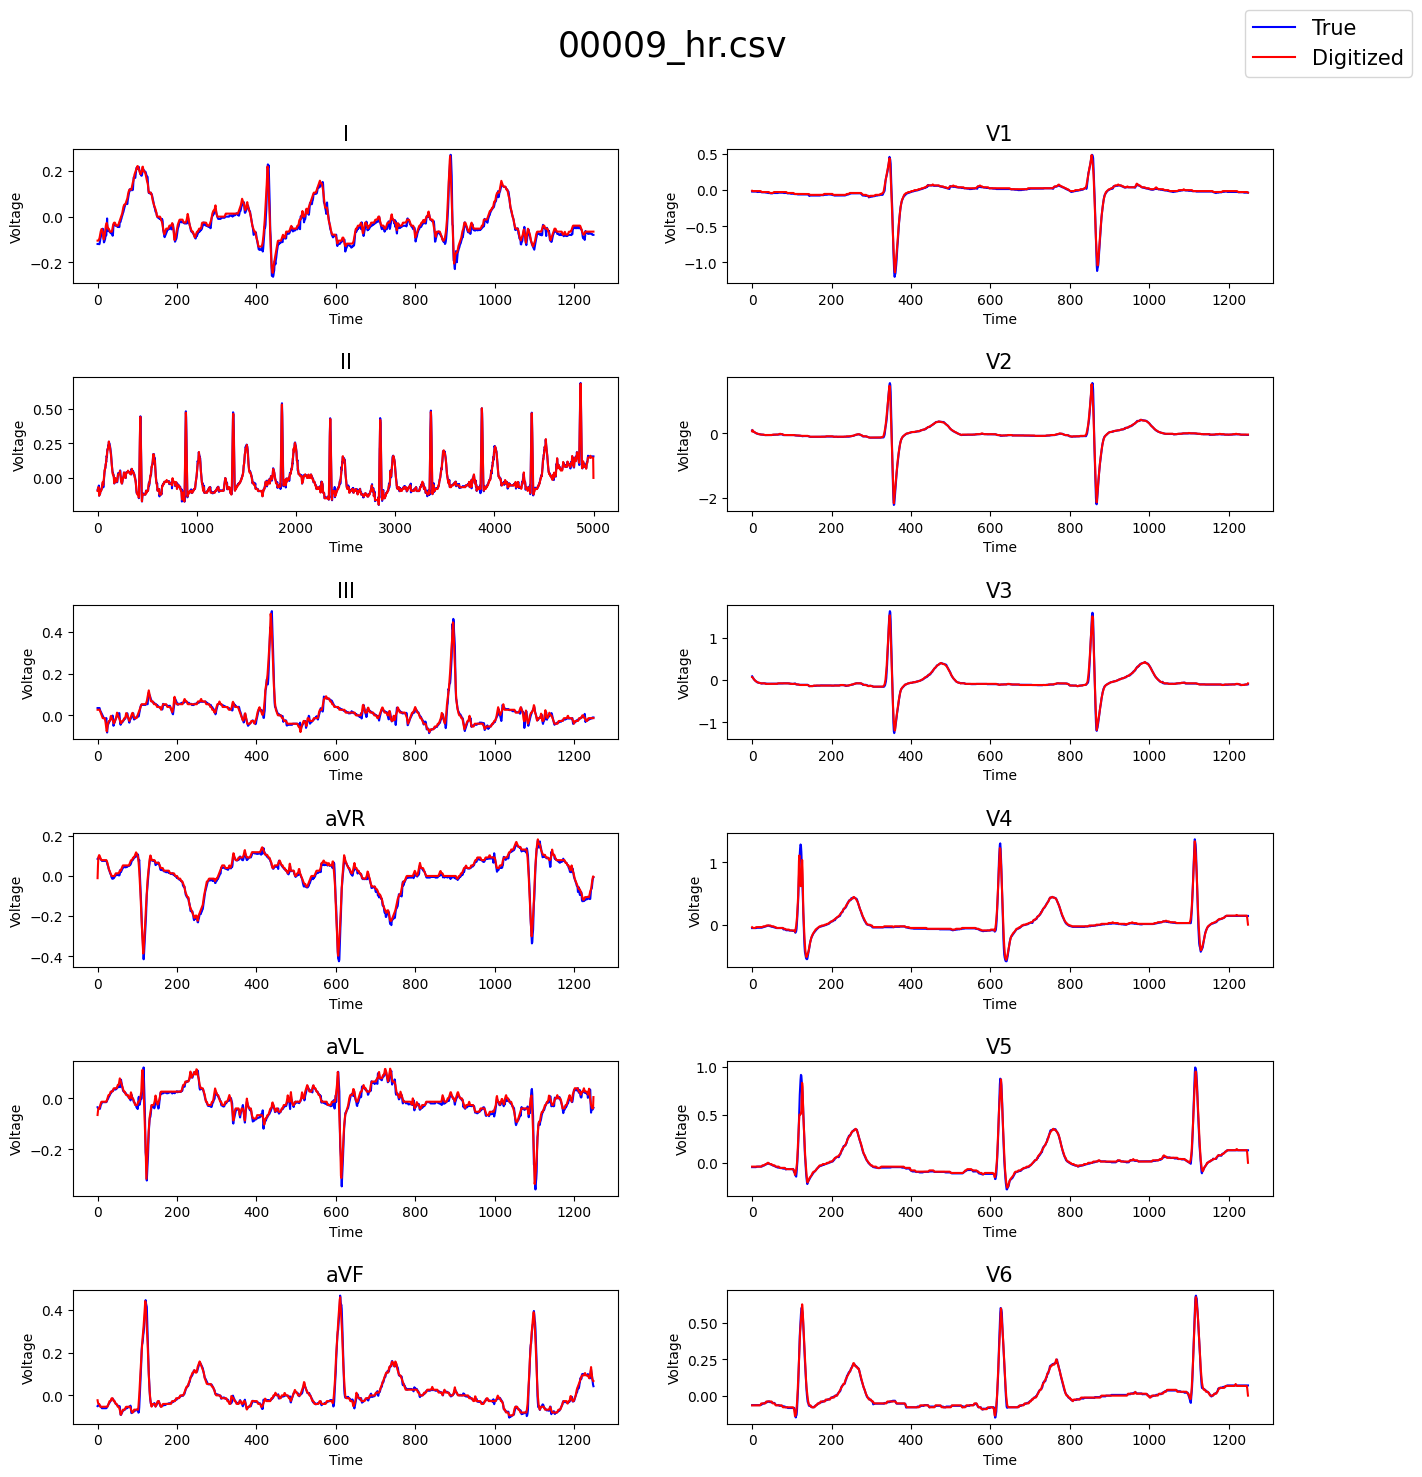

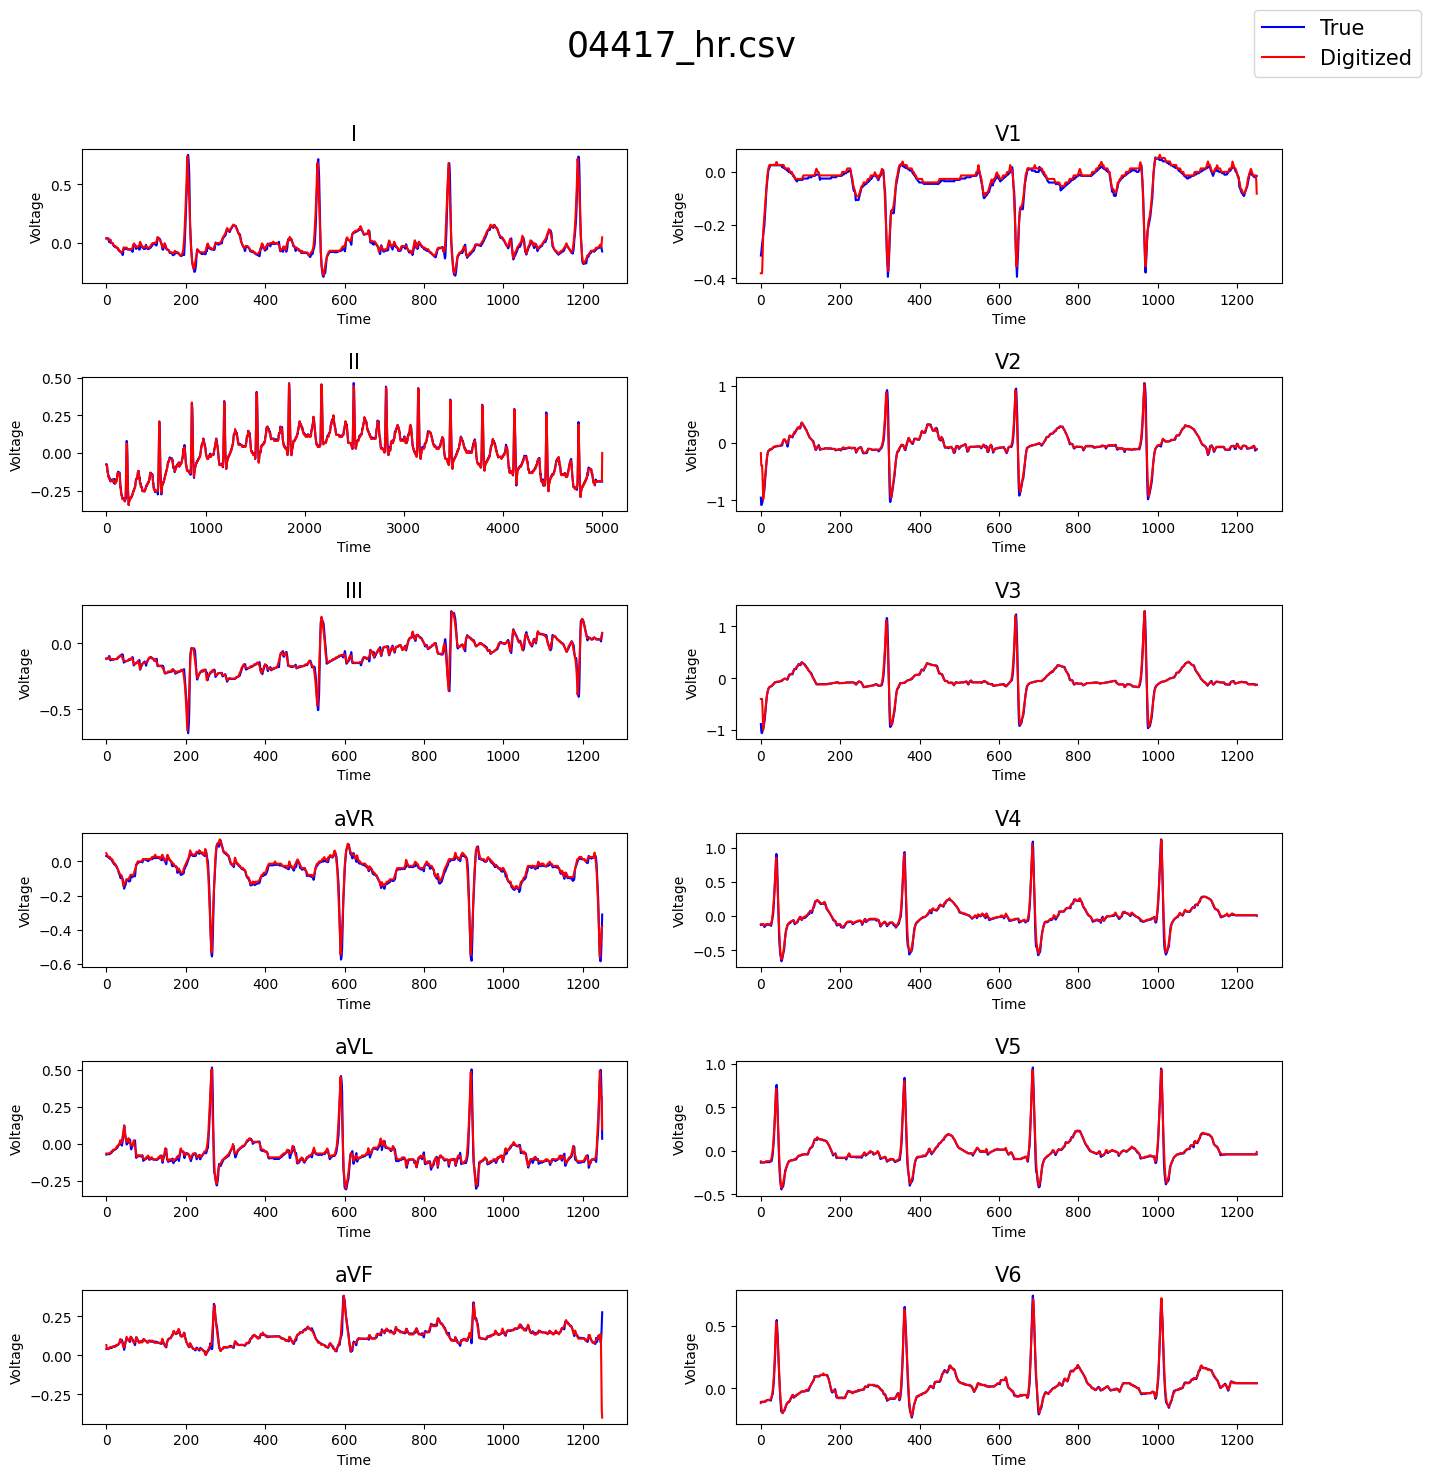

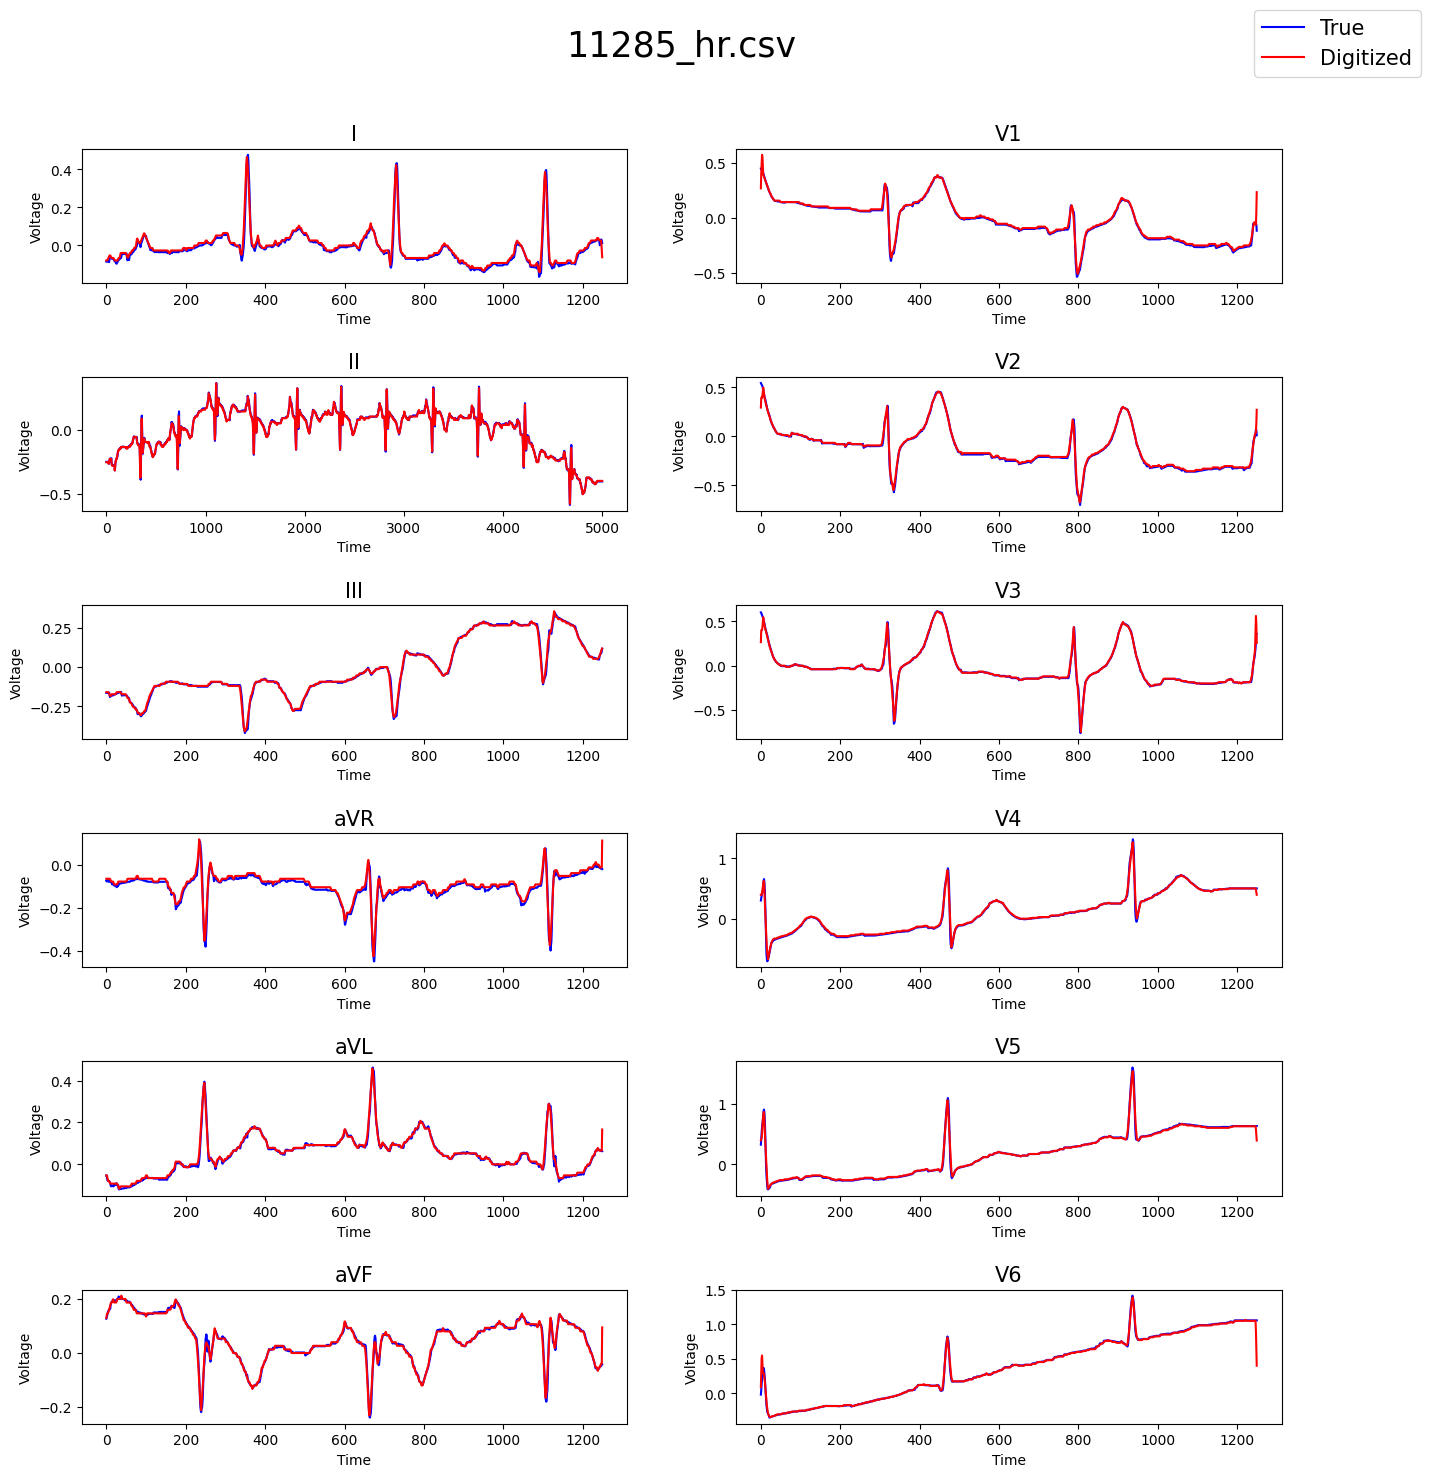

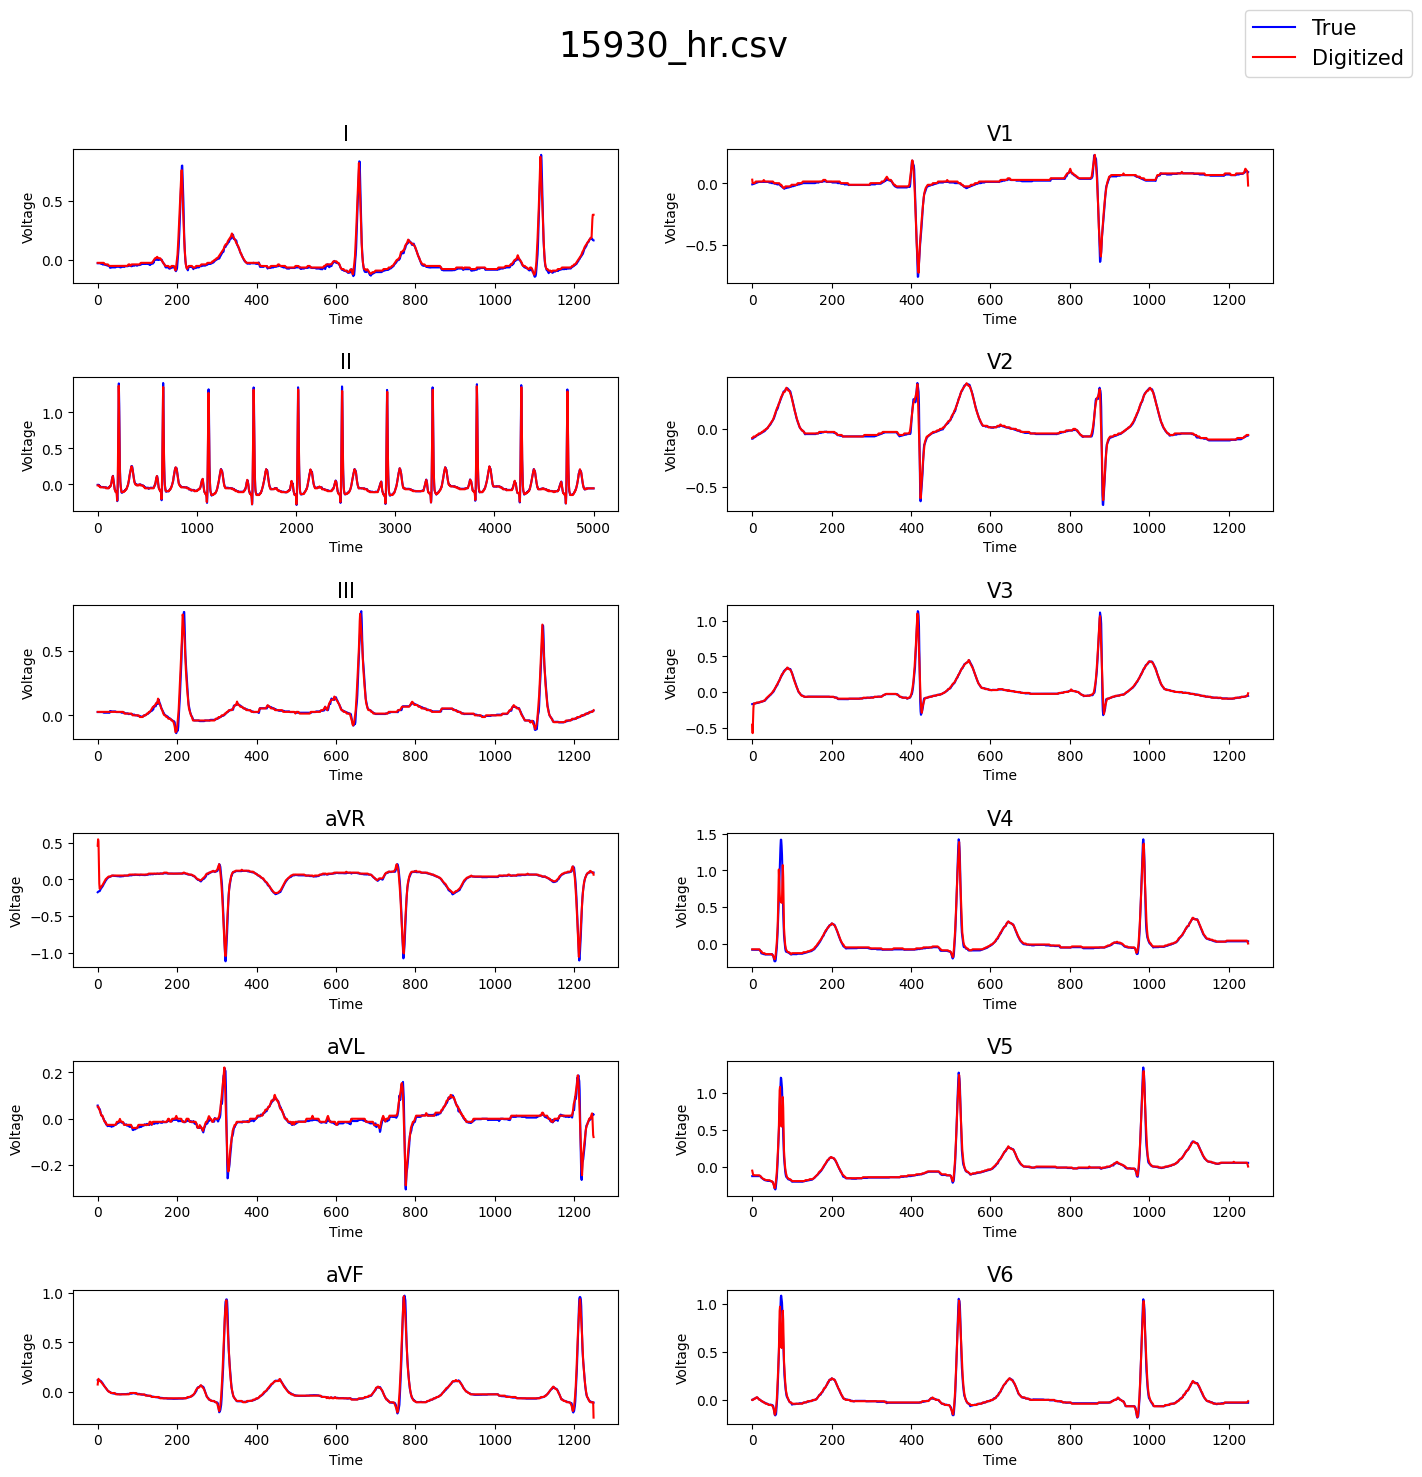

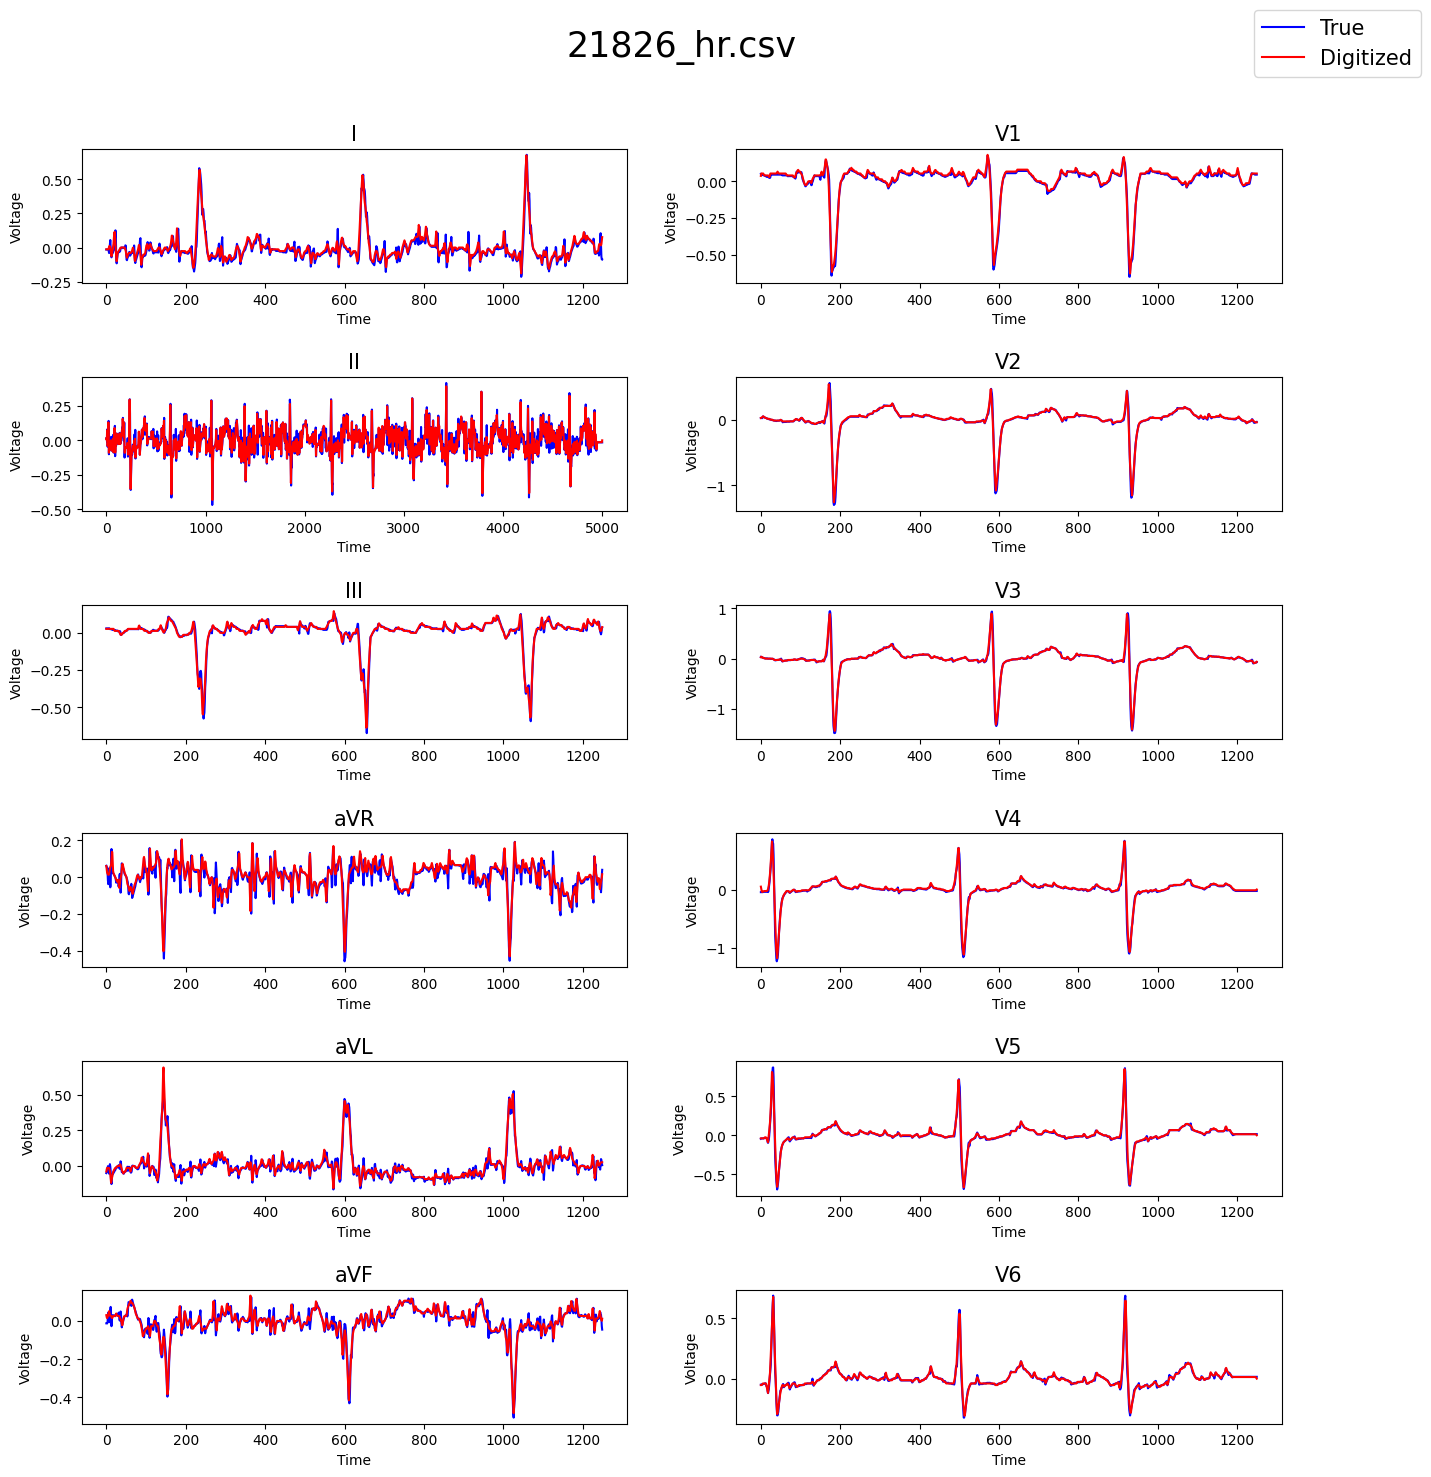

In [15]:
visualize("00009_hr.csv")
visualize("04417_hr.csv")
visualize("11285_hr.csv")
visualize("15930_hr.csv")
visualize("21826_hr.csv")